# **Web Scraping Assignment - Data Analysis Course**

**Welcome** to the Web Scraping assignment. Your task is to scrape rental price data for apartments in Cluj-Napoca from the OLX website and create meaningful visual representations of the collected data. Use Python and relevant libraries to extract, process, and visualize the information.

---

### **Task Description**

The goal of this assignment is to scrape rental listings from OLX for apartments in Cluj-Napoca and analyze the relationship between apartment sizes, room categories, and rental prices. You will:

1. **Extract Data** from multiple pages of OLX rental listings in Cluj-Napoca. [Visit the website here](https://www.olx.ro/imobiliare/apartamente-garsoniere-de-inchiriat/cluj-napoca/).
2. **Visualize rental prices** as a function of apartment size.
3. **Categorize apartments by the number of rooms** and analyze price variations across these categories.
4. **Calculate average rental prices** for different size groups and room categories.

---

### **Data Collection & Web Scraping**

- Use **BeautifulSoup** and **Requests** to extract rental prices, apartment sizes, and room numbers from OLX listings.
- Scrape data from **multiple pages** to ensure a representative sample size.
- Organize the data into a structured format such as a **Pandas DataFrame** for easier analysis.

---

### **Data Visualization Requirements**

- Create **various visualizations** to effectively represent the data and highlight trends.
- Ensure the visualizations are easy to understand, with proper labels, titles, and legends.
- Focus on visualizing the relationship between rental prices, apartment sizes, and room categories.

---

### **Submission Instructions**

1. **Upload your solution to GitHub** in the same project as your previous assignment. If the dataset is too large to upload, provide a link to the data in your notebook.
2. Ensure that the code is well-documented and easy to follow.

---

### **Exploration and Tools**

For this assignment, you are encouraged to explore the following libraries:

- **Requests**
- **BeautifulSoup**

To get started with web scraping, check out these tutorials that provide step-by-step guidance:

- [Web Scraping Tutorial 1](https://colab.research.google.com/github/Giffy/AI_Intro-to-Machine-Learning/blob/master/Session-9/Intro_to_web_scraping.ipynb#scrollTo=nekvLjaS6WNz)  
- [Web Scraping Tutorial 2](https://colab.research.google.com/github/nestauk/im-tutorials/blob/3-ysi-tutorial/notebooks/Web-Scraping/Web%20Scraping%20Tutorial.ipynb#scrollTo=qK-EQGZ6DAuv)


**Minimalist Example**

Extracting all external links from the Wikipedia page about the blue whale:

In [1]:
import json
!pip install cssselect
!pip install requests_html
!pip install lxml_html_clean
!pip install bs4

You should consider upgrading via the 'C:\Users\TEO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\TEO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\TEO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\TEO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [5]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

In [23]:
from lxml import html
import pandas as pd
def get_page(i):
    if i == 1:
        url = "https://www.olx.ro/imobiliare/apartamente-garsoniere-de-inchiriat/cluj-napoca/"
    else:
        url = f"https://www.olx.ro/imobiliare/apartamente-garsoniere-de-inchiriat/cluj-napoca/?page={i}"


    response = requests.get(url)
    return response.text

def extract_listing_urls(html_content: str) -> list:
    tree = html.fromstring(html_content)
    
    # Select the main container using the fixed XPath
    container = tree.cssselect(".css-j0t2x2")
    print(container)
    if not container:
        return []

    container = container[0]
    urls = []

    # Iterate over all direct <div> children of the container
    for div in container.xpath('.//div'):
        # Try to extract URL from <a> tag inside the div
        link = div.xpath('.//a/@href')
        if link:
            if "https" not in link[0]:
                link = "https://www.olx.ro" + link[0]
            urls.append(link[0])

    return list(set(urls))

def extract_price_room_storia(url):
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/122.0.0.0 Safari/537.36"
        )
    }

    response = requests.get(url, headers=headers)
    htmlcnt = response.text
    
    tree = html.fromstring(htmlcnt)
    # print(htmlcnt)
    try:
        price = tree.cssselect(".css-1o51x5a")[0].text_content()
        price = ''.join([str(x) for x in price if x.isdigit()])
        price = int(price)
    except:
        price = None
    try:
        room_nr = tree.xpath("/html/body/div[1]/div[1]/main/div[4]/div[1]/div[2]/div[1]/button[2]")[0].text_content()
        room_nr = ''.join([str(x) for x in room_nr if x.isdigit()])
        room_nr = int(room_nr)
    except:
        room_nr = None

    return price, room_nr

    
def extract_price_room_olx(url):
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/122.0.0.0 Safari/537.36"
        )
    }
    
    response = requests.get(url, headers=headers)
    htmlcnt = response.text
    
    tree = html.fromstring(htmlcnt)
    
    price = tree.xpath("/html/body/div[2]/div[2]/div/div[2]/div[3]/div[1]/div[2]/div[1]/div[3]/div/h3")[0].text_content()
    price = ''.join([str(x) for x in price if x.isdigit()])
    print(price)
    try:
        price = int(price)
    except:
        price = None
    
    room_nr = tree.xpath("/html/body/div[2]/div[2]/div/div[2]/div[2]/div[2]/nav/ol/li[4]/a")[0].text_content()
    room_nr = ''.join([str(x) for x in room_nr if x.isdigit()])
    try:
        room_nr = int(room_nr)
    except:
        room_nr = None
    return price, room_nr
results = []
    
for page in range(10):
    urls = extract_listing_urls(get_page(page))
    
    for url in urls:
        if "storia" in url:
            price, room_nr = extract_price_room_storia(url)
            results.append((room_nr, price))
        if "olx" in url:
            price, room_nr = extract_price_room_olx(url)
            results.append((room_nr,price))
            
df = pd.DataFrame(results, columns=["rooms", "price"])

print(df)
            

[<Element div at 0x1487f73e4a0>]
[<Element div at 0x1487f167220>]
[<Element div at 0x1487f03fea0>]
[<Element div at 0x1487f7bd630>]
[<Element div at 0x1487f767040>]
[<Element div at 0x1487edbfe50>]
[<Element div at 0x14871a26630>]
[<Element div at 0x1487f03f590>]
[<Element div at 0x1487f767040>]
[<Element div at 0x1487f767040>]
     rooms  price
0      2.0  475.0
1      3.0  700.0
2      3.0  950.0
3      2.0  500.0
4      2.0  700.0
..     ...    ...
402    2.0  470.0
403    3.0  549.0
404    2.0  799.0
405    2.0  550.0
406    3.0  800.0

[407 rows x 2 columns]


C:\Users\TEO\AppData\Local\Temp\ipykernel_17204\3483393885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["rooms"] = df_clean["rooms"].astype(int)
C:\Users\TEO\AppData\Local\Temp\ipykernel_17204\3483393885.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["price"] = df_clean["price"].astype(float)


<Figure size 800x600 with 0 Axes>

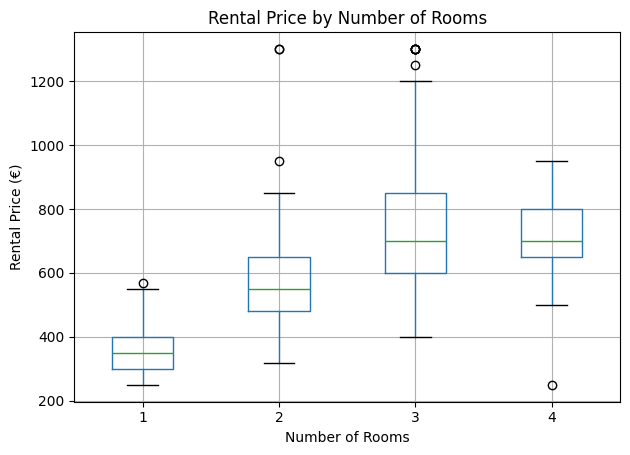

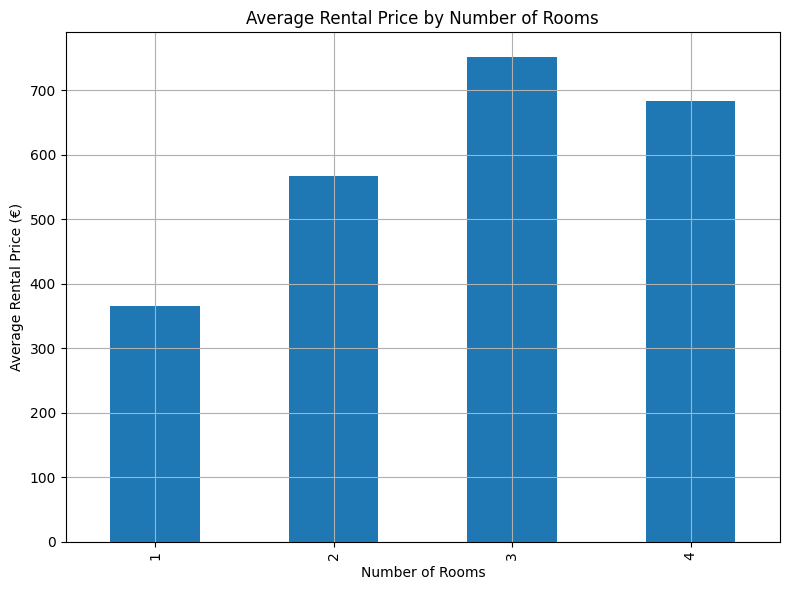

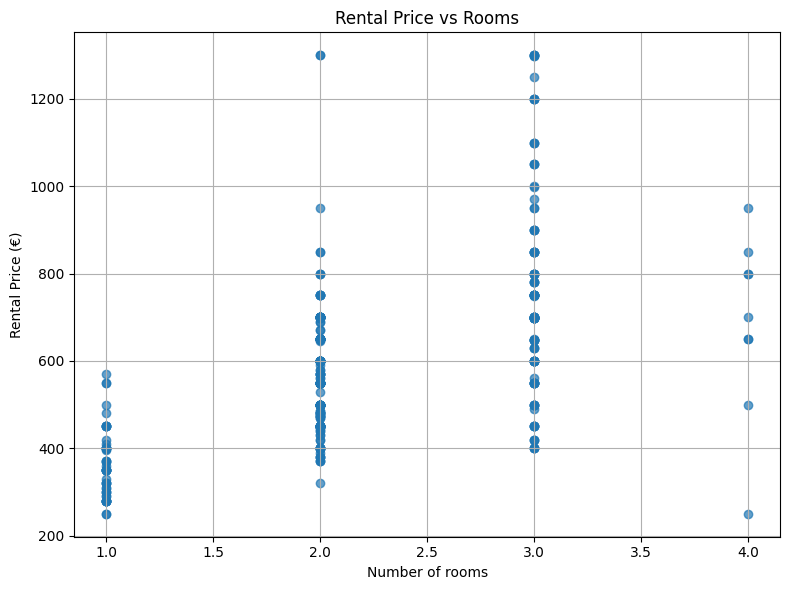

In [26]:
df_clean = df.dropna(subset=["rooms", "price"])


df_clean["rooms"] = df_clean["rooms"].astype(int)
df_clean["price"] = df_clean["price"].astype(float)


plt.figure(figsize=(8, 6))
df_clean.boxplot(column="price", by="rooms")
plt.title("Rental Price by Number of Rooms")
plt.suptitle("")
plt.xlabel("Number of Rooms")
plt.ylabel("Rental Price (€)")
plt.grid(True)
plt.tight_layout()
plt.savefig("./boxplot.pdf")


avg_price_by_rooms = df_clean.groupby("rooms")["price"].mean()
plt.figure(figsize=(8, 6))
avg_price_by_rooms.plot(kind="bar")
plt.title("Average Rental Price by Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Average Rental Price (€)")
plt.grid(True)
plt.tight_layout()
plt.savefig("./bars.pdf")


# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_clean["rooms"], df_clean["price"], alpha=0.7)
plt.title("Rental Price vs Rooms")
plt.xlabel("Number of rooms")
plt.ylabel("Rental Price (€)")
plt.grid(True)
plt.tight_layout()
plt.savefig("./scatter.pdf")
